<a href="https://colab.research.google.com/github/Asif520/Pytorch_learning_projects/blob/main/Iris_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [3]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
data['variety'] = data['variety'].replace('Setosa',0.0)
data['variety'] = data['variety'].replace('Versicolor',1.0)
data['variety'] = data['variety'].replace('Virginica',2.0)
data

<ipython-input-4-2c42186fba81>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['variety'] = data['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
# creating X & y
X = data.drop('variety',axis=1)
y= data['variety']

In [6]:
# Convert x,y into numpy arrays
X= X.values
y=y.values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
# convert X values to torch Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [10]:
# convert y labels to longTensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [11]:
class Model(nn.Module):
    # 4 features
    # 2 hidden layers
    # 3 outputs
    def __init__(self,in_features =4, h1=8, h2=9,out_features =3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [12]:
# seed for radomization
torch.manual_seed(42)
# create instantiate of Model
model = Model()

In [13]:
# set criteron of model to measure the error
criterion = nn.CrossEntropyLoss()

# choose adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [15]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 22.7 MB/s eta 0:00:00


In [16]:
from torchmetrics.classification import Accuracy

accuracy = Accuracy(task="multiclass", num_classes=3)

In [17]:
#epochs
epochs = 100
losses = []
accuracy_track = []
#Train Model
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred,y_train)
    acc = accuracy(y_pred,y_train)
    accuracy_track.append(acc.detach().numpy())
    losses.append(loss.detach().numpy())

    if i%10==0 :
        print(f'Epoch: {i} accuracy: {acc} loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 accuracy: 0.34166666865348816 loss: 1.0846974849700928
Epoch: 10 accuracy: 0.6583333611488342 loss: 0.4929122030735016
Epoch: 20 accuracy: 0.875 loss: 0.22069598734378815
Epoch: 30 accuracy: 0.9583333134651184 loss: 0.08433595299720764
Epoch: 40 accuracy: 0.9583333134651184 loss: 0.0667315274477005
Epoch: 50 accuracy: 0.9833333492279053 loss: 0.06453204900026321
Epoch: 60 accuracy: 0.9833333492279053 loss: 0.06003931537270546
Epoch: 70 accuracy: 0.9666666388511658 loss: 0.05728408321738243
Epoch: 80 accuracy: 0.9750000238418579 loss: 0.05500824749469757
Epoch: 90 accuracy: 0.9666666388511658 loss: 0.05377717688679695


Text(0.5, 0, 'epochs')

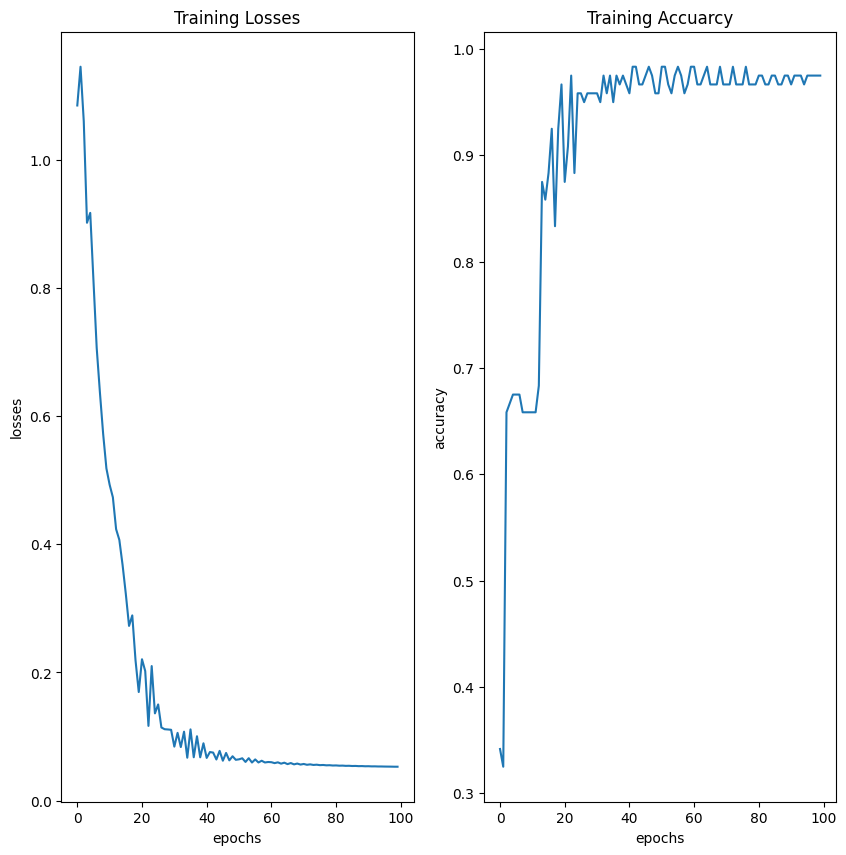

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(epochs),losses)
plt.title('Training Losses')
plt.ylabel('losses')
plt.xlabel('epochs')

plt.subplot(1, 2, 2)
plt.plot(range(epochs),accuracy_track)
plt.title('Training Accuarcy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [19]:
# Evalute Test data set usig trained model
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval,y_test)
    acc = accuracy(y_eval,y_test)

In [20]:
loss

tensor(0.0451)

In [21]:
acc

tensor(1.)

In [23]:
#Testing data
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)

        if y_val.argmax().item() == y_test[i]:
            correct+=1
        print(f'{i+1}.)  {str(y_val)} \t {"Setosa" if y_test[i] == 0 else "Versicolor" if y_test[i] == 1 else "Virginica"} \t {y_test[i]} \t {y_val.argmax().item()}')
    print("Correct:",correct)

1.)  tensor([-11.6963,   5.3850,  -0.6120]) 	 Versicolor 	 1 	 1
2.)  tensor([ 17.3414,   7.3208, -27.0364]) 	 Setosa 	 0 	 0
3.)  tensor([-35.9970,   6.0093,  17.6179]) 	 Virginica 	 2 	 2
4.)  tensor([-12.8993,   5.2543,   0.6171]) 	 Versicolor 	 1 	 1
5.)  tensor([-13.3835,   5.6363,   0.2611]) 	 Versicolor 	 1 	 1
6.)  tensor([ 16.2940,   6.8700, -25.3662]) 	 Setosa 	 0 	 0
7.)  tensor([-4.2922,  5.5066, -6.7038]) 	 Versicolor 	 1 	 1
8.)  tensor([-23.4511,   5.1418,   9.2597]) 	 Virginica 	 2 	 2
9.)  tensor([-16.7706,   4.8315,   4.5284]) 	 Versicolor 	 1 	 1
10.)  tensor([-6.4598,  5.4327, -4.8456]) 	 Versicolor 	 1 	 1
11.)  tensor([-20.3434,   5.1933,   6.6650]) 	 Virginica 	 2 	 2
12.)  tensor([ 15.2653,   6.4227, -23.6970]) 	 Setosa 	 0 	 0
13.)  tensor([ 16.8936,   7.1271, -26.3161]) 	 Setosa 	 0 	 0
14.)  tensor([ 15.5037,   6.5259, -24.0805]) 	 Setosa 	 0 	 0
15.)  tensor([ 16.5805,   6.9917, -25.8125]) 	 Setosa 	 0 	 0
16.)  tensor([-12.6115,   5.6030,  -0.2899]) 	 Versi

In [24]:
new_iris = torch.Tensor([6.2,3.4,5.4,2.3])

In [25]:
with torch.no_grad():
    y_val1 = model.forward(new_iris)
    print(f' {str(y_val1)} \t {"Setosa" if y_val1.argmax().item() == 0 else "Versicolor" if y_val1.argmax().item() == 1 else "Virginica"} \t {y_val1.argmax().item()}')

 tensor([-25.2893,   4.8183,  11.3229]) 	 Virginica 	 2


In [26]:
#save model

torch.save(model.state_dict(), 'iris_model.pt')

In [27]:
#load
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-27-edf19fa8d65b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [28]:
with torch.no_grad():
    y_val1 = new_model.forward(new_iris)
    print(f' {str(y_val1)} \t {"Setosa" if y_val1.argmax().item() == 0 else "Versicolor" if y_val1.argmax().item() == 1 else "Virginica"} \t {y_val1.argmax().item()}')

 tensor([-25.2893,   4.8183,  11.3229]) 	 Virginica 	 2
